In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import joblib

In [71]:
target = pd.read_csv('Chess_Target_Winner.csv')
data_df = pd.read_csv('Clean_Chess_Features_Data.csv')

In [72]:
decoded_data = data_df.copy()

In [73]:
label_encoded = joblib.load('label_encoder.pkl')
ordinal_encoded = joblib.load('ordinal_encoder.pkl')

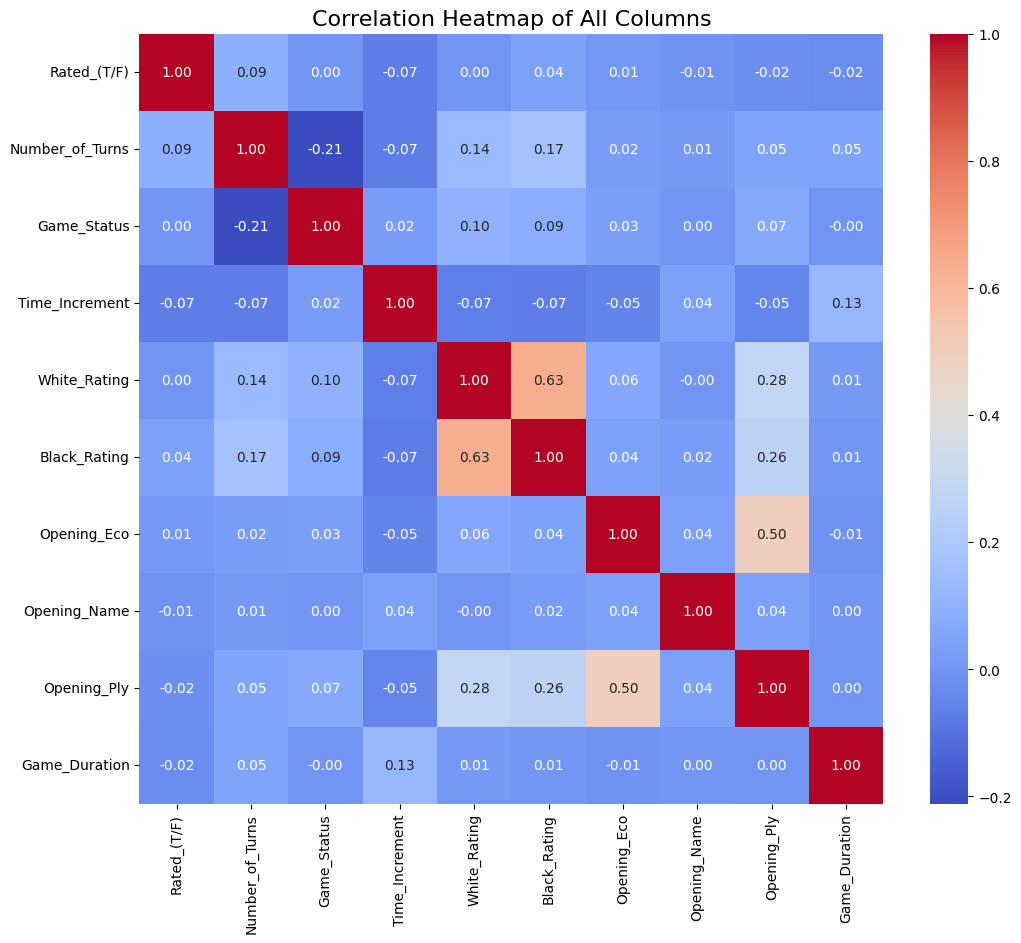

In [74]:
# Assuming 'df' is your DataFrame with numerical data
# Step 1: Compute correlation matrix
correlation_matrix = data_df.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Step 3: Customize and show plot
plt.title("Correlation Heatmap of All Columns", fontsize=16)
plt.show()

In [75]:
data_df.columns

Index(['Rated_(T/F)', 'Number_of_Turns', 'Game_Status', 'Time_Increment',
       'White_Rating', 'Black_Rating', 'Opening_Eco', 'Opening_Name',
       'Opening_Ply', 'Game_Duration'],
      dtype='object')

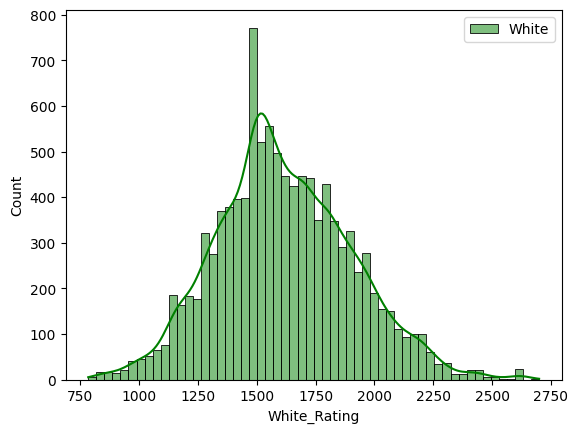

In [76]:
sns.histplot(data_df['White_Rating'], kde=True, color='green', label='White')
plt.legend()

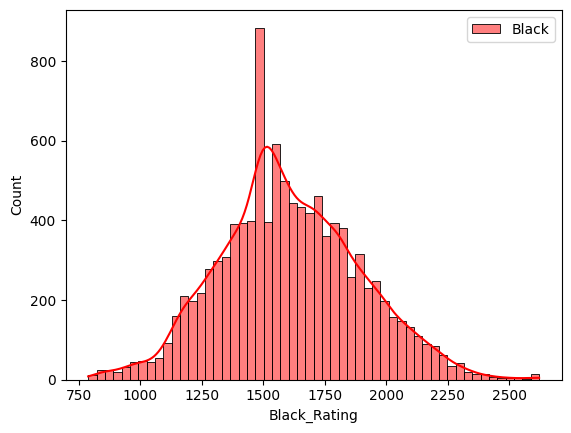

In [77]:
sns.histplot(data_df['Black_Rating'], kde=True, color='red', label='Black')
plt.legend()

<Axes: xlabel='Winner', ylabel='count'>

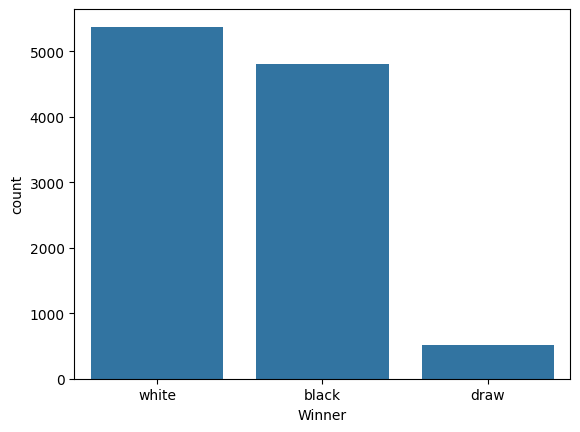

In [78]:
sns.countplot(data=data_df, x=target['Winner'])

<Axes: xlabel='Winner', ylabel='White_Rating'>

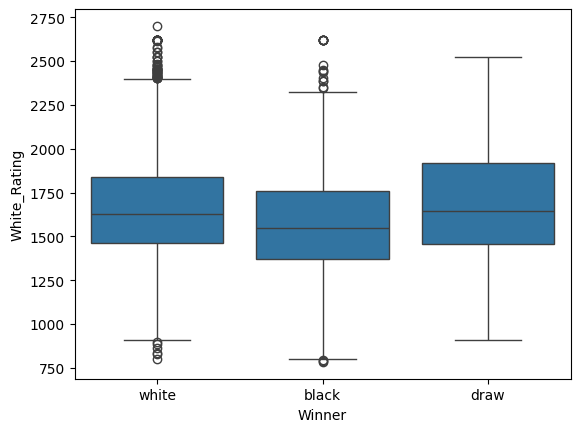

In [79]:
sns.boxplot(data=data_df, x=target['Winner'], y='White_Rating')

<Axes: xlabel='Winner', ylabel='Black_Rating'>

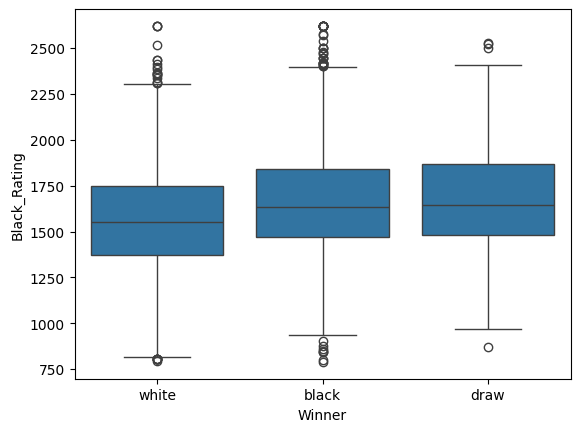

In [80]:
sns.boxplot(data=data_df, x=target['Winner'], y='Black_Rating')

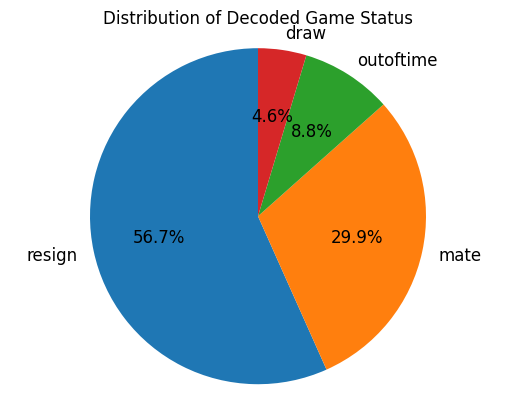

In [81]:
decoded_game_status = ordinal_encoded.inverse_transform(data_df[['Game_Status']])

# Update the DataFrame with the decoded values
decoded_data['Decoded_Game_Status'] = decoded_game_status.flatten()  # Flatten to 1D array

# Now you can use the decoded labels in your pie chart
game_status_counts = decoded_data['Decoded_Game_Status'].value_counts()

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(game_status_counts, 
                                  labels=game_status_counts.index, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  textprops={'fontsize': 12})

ax.axis('equal')  
plt.title('Distribution of Decoded Game Status')
plt.show()

<Axes: xlabel='Time_Increment', ylabel='Game_Duration'>

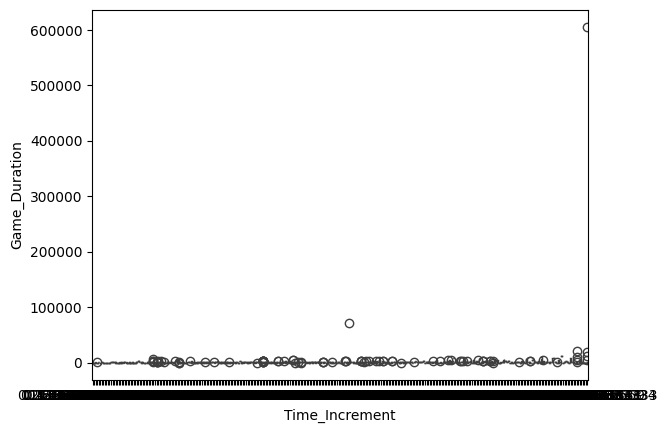

In [82]:
sns.boxplot(data=data_df, x='Time_Increment', y='Game_Duration')

c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: ylabel='Decoded_Opening_Name'>

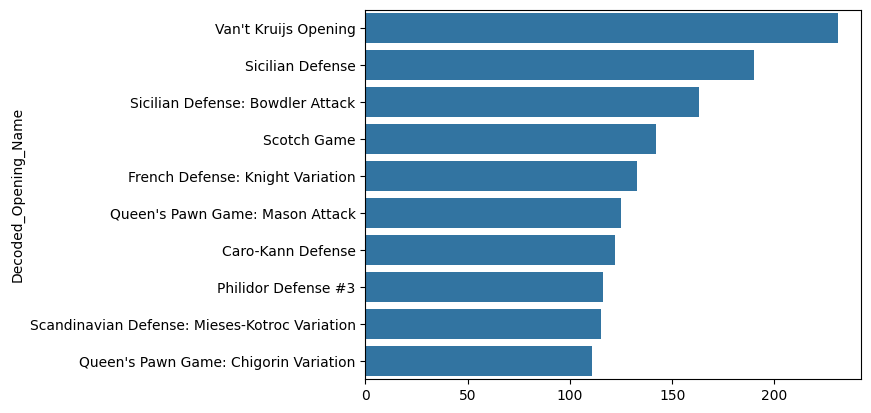

In [83]:
Decoded_Opening_Name = label_encoded.inverse_transform(data_df[['Opening_Name']])
decoded_data['Decoded_Opening_Name'] = Decoded_Opening_Name
top_openings = decoded_data['Decoded_Opening_Name'].value_counts().head(10).T
sns.barplot(x=top_openings.values, y=top_openings.index)

<Axes: xlabel='Opening_Ply', ylabel='White_Rating'>

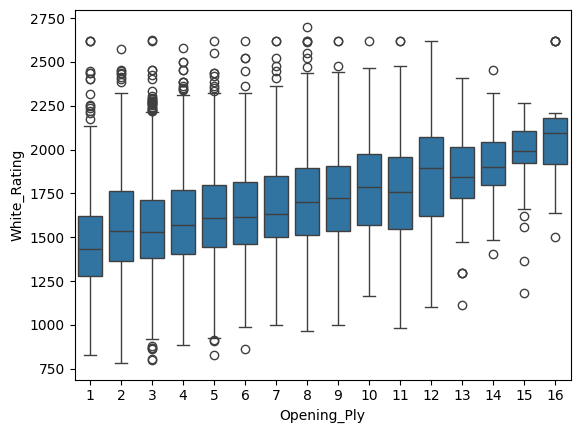

In [84]:
sns.boxplot(data=data_df, x='Opening_Ply', y='White_Rating')

In [85]:
data_df.columns

Index(['Rated_(T/F)', 'Number_of_Turns', 'Game_Status', 'Time_Increment',
       'White_Rating', 'Black_Rating', 'Opening_Eco', 'Opening_Name',
       'Opening_Ply', 'Game_Duration'],
      dtype='object')

<Axes: xlabel='Number_of_Turns', ylabel='Count'>

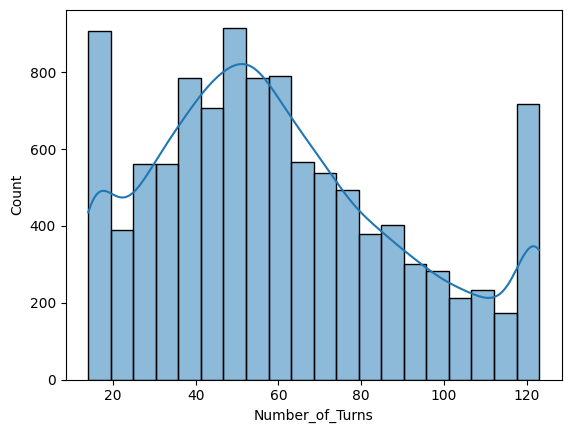

In [86]:
sns.histplot(data_df['Number_of_Turns'], kde=True, bins=20)

<Axes: xlabel='White_Rating', ylabel='Black_Rating'>

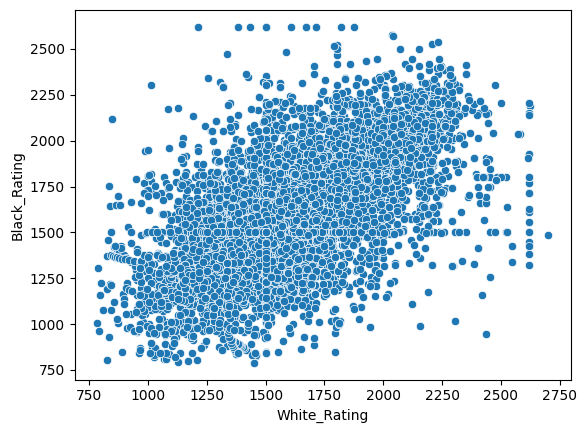

In [87]:
sns.scatterplot(data=data_df, x='White_Rating', y='Black_Rating')

<Axes: xlabel='Number_of_Turns', ylabel='Game_Duration'>

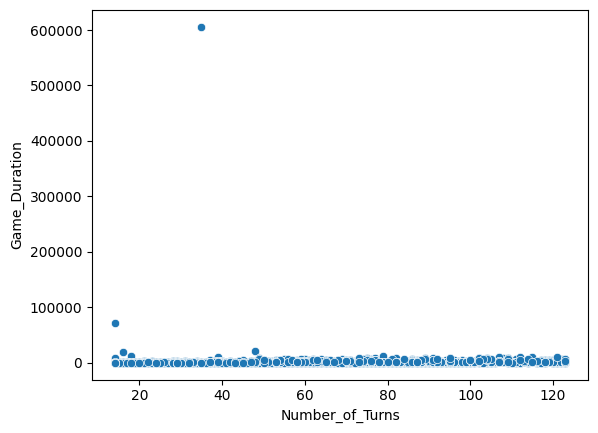

In [88]:
sns.scatterplot(data=data_df, x='Number_of_Turns', y='Game_Duration')

<Axes: xlabel='Opening_Name', ylabel='count'>

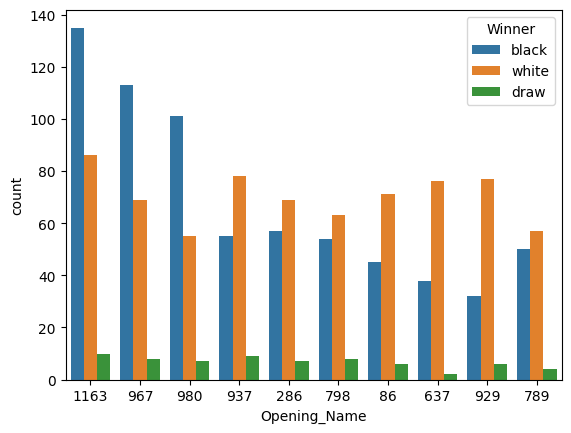

In [89]:
sns.countplot(data=data_df, x='Opening_Name', hue=target['Winner'], order=data_df['Opening_Name'].value_counts().iloc[:10].index)

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_14172\3464376752.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=decoded_data, x='Decoded_Rated', palette='pastel')


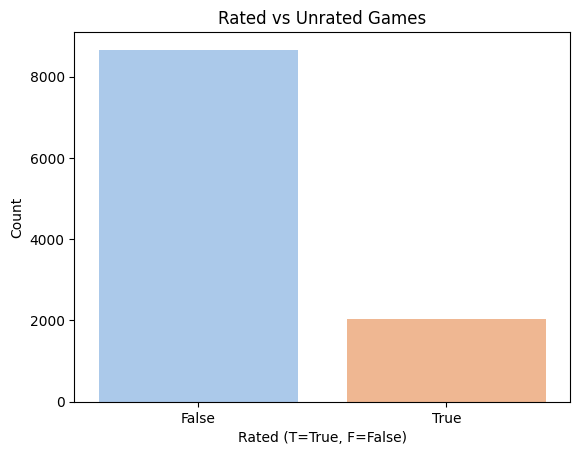

In [90]:
# Decode the 'Rated_(T/F)' column using the ordinal encoder
decoded_rated = ordinal_encoded.inverse_transform(data_df[['Rated_(T/F)']])

# Add the decoded values back to the DataFrame for easier visualization
decoded_data['Decoded_Rated'] = decoded_rated.flatten()  # Flatten to 1D array if necessary
# Assuming 0 maps to False and 1 maps to True
decoded_data['Decoded_Rated'] = data_df['Rated_(T/F)'].replace({1: 'False', 0: 'True'})

# Plot the count of rated vs unrated games
sns.countplot(data=decoded_data, x='Decoded_Rated', palette='pastel')
plt.title('Rated vs Unrated Games')
plt.xlabel('Rated (T=True, F=False)')
plt.ylabel('Count')
plt.show()

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_14172\3923781078.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_df, x=target['Winner'], y='Number_of_Turns', palette='Set2')


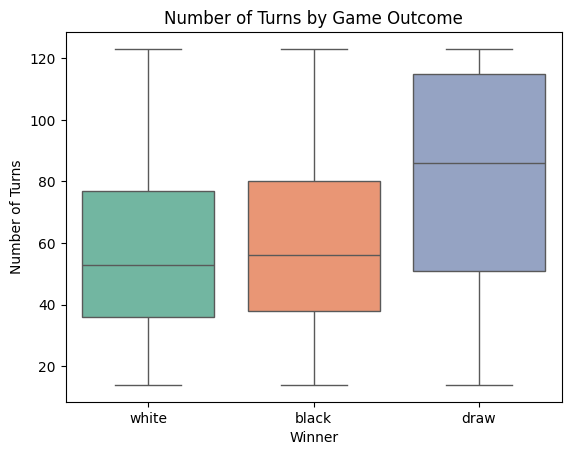

In [91]:
sns.boxplot(data=data_df, x=target['Winner'], y='Number_of_Turns', palette='Set2')
plt.title('Number of Turns by Game Outcome')
plt.xlabel('Winner')
plt.ylabel('Number of Turns')
plt.show()

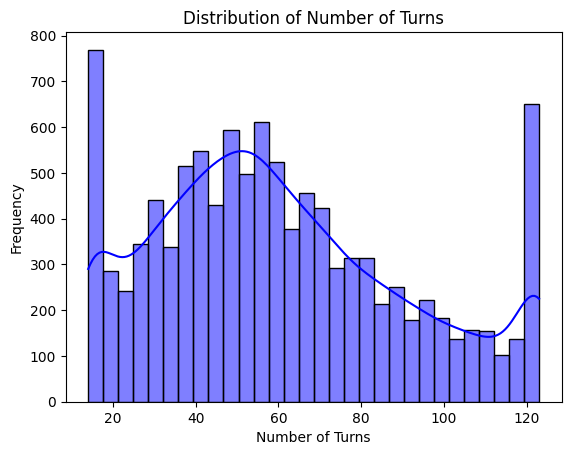

In [92]:
sns.histplot(data=data_df, x='Number_of_Turns', kde=True, color='blue', bins=30)
plt.title('Distribution of Number of Turns')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.show()


C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_14172\2241840341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=game_status_counts.index, y=game_status_counts.values, palette='viridis')


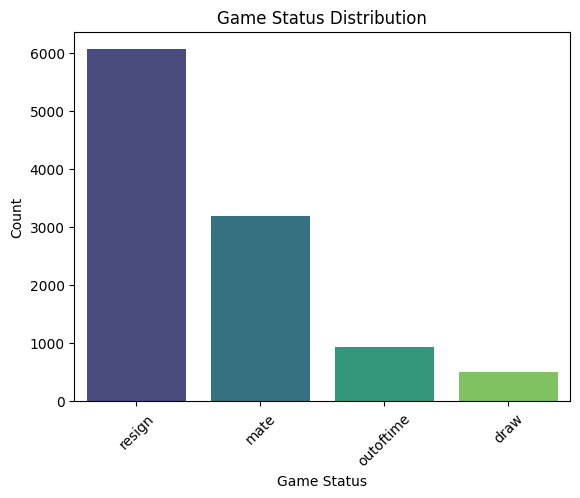

In [93]:
game_status_counts = decoded_data['Decoded_Game_Status'].value_counts()
sns.barplot(x=game_status_counts.index, y=game_status_counts.values, palette='viridis')
plt.title('Game Status Distribution')
plt.xlabel('Game Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

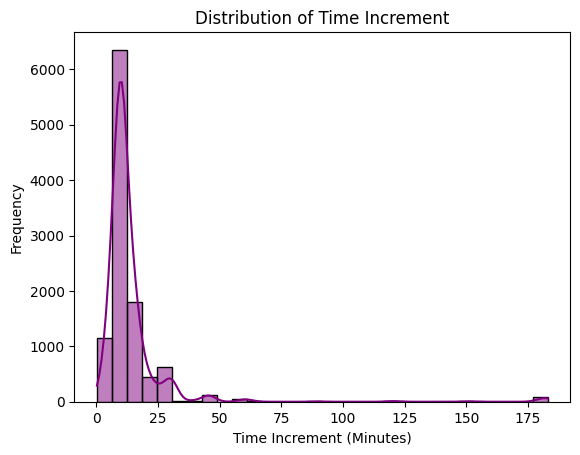

In [94]:
sns.histplot(data=data_df, x='Time_Increment', kde=True, color='purple', bins=30)
plt.title('Distribution of Time Increment')
plt.xlabel('Time Increment (Minutes)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_14172\4289088634.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_df, x=target['Winner'], y='White_Rating', palette='Blues', inner='quartile')


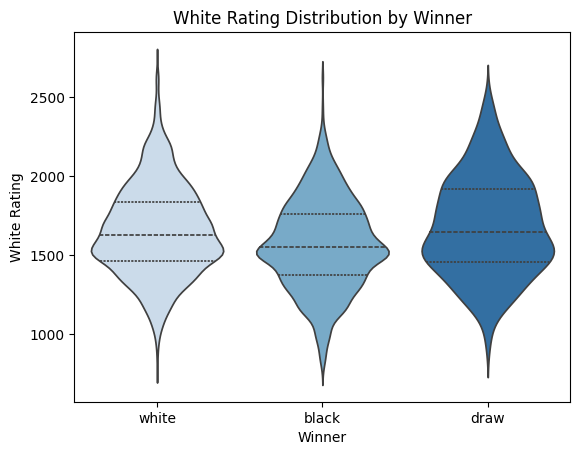

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_14172\4289088634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_df, x=target['Winner'], y='Black_Rating', palette='Reds', inner='quartile')


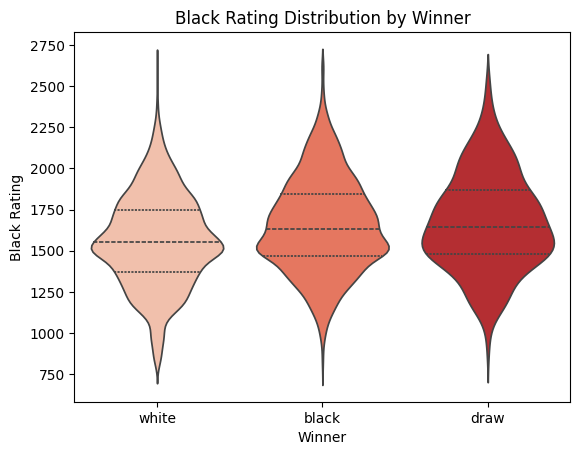

In [95]:
sns.violinplot(data=data_df, x=target['Winner'], y='White_Rating', palette='Blues', inner='quartile')
plt.title('White Rating Distribution by Winner')
plt.xlabel('Winner')
plt.ylabel('White Rating')
plt.show()

sns.violinplot(data=data_df, x=target['Winner'], y='Black_Rating', palette='Reds', inner='quartile')
plt.title('Black Rating Distribution by Winner')
plt.xlabel('Winner')
plt.ylabel('Black Rating')
plt.show()

C:\Users\Kshitish Pandit\AppData\Local\Temp\ipykernel_14172\1923204833.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x='Opening_Eco', order=data_df['Opening_Eco'].value_counts().iloc[:10].index, palette='muted')


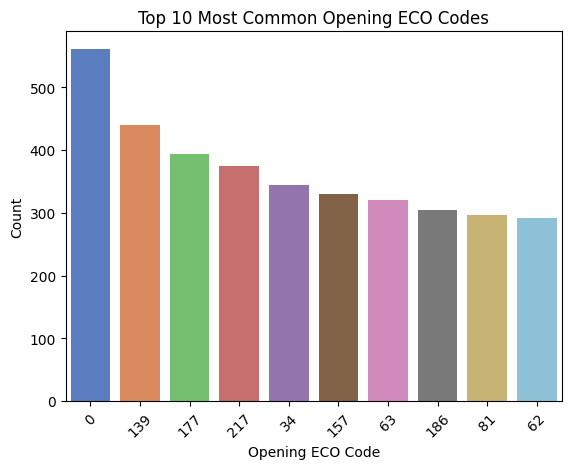

In [96]:
sns.countplot(data=data_df, x='Opening_Eco', order=data_df['Opening_Eco'].value_counts().iloc[:10].index, palette='muted')
plt.title('Top 10 Most Common Opening ECO Codes')
plt.xlabel('Opening ECO Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

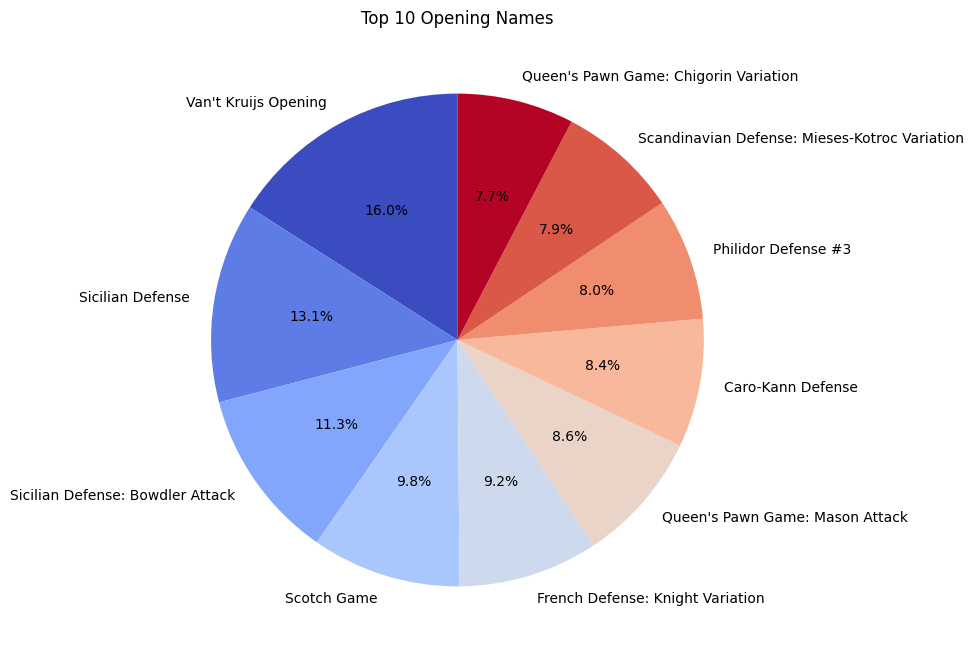

In [97]:
top_openings = decoded_data['Decoded_Opening_Name'].value_counts().head(10)
top_openings.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), colormap='coolwarm')
plt.title('Top 10 Opening Names')
plt.ylabel('')  # Remove default y-label
plt.show()

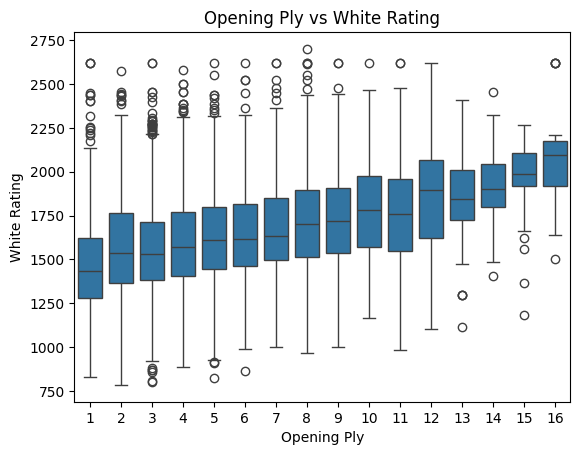

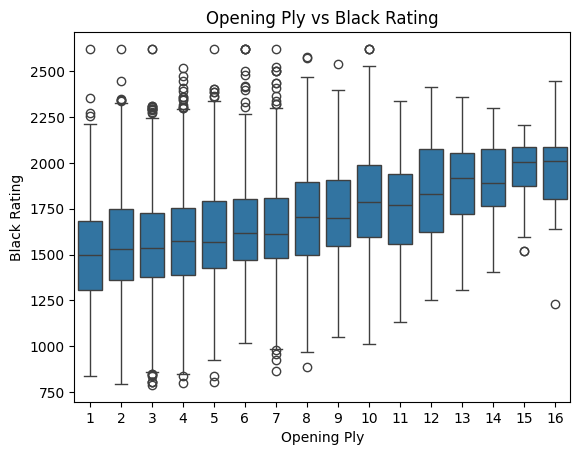

In [98]:
sns.boxplot(data=data_df, x='Opening_Ply', y='White_Rating')
plt.title('Opening Ply vs White Rating')
plt.xlabel('Opening Ply')
plt.ylabel('White Rating')
plt.show()

sns.boxplot(data=data_df, x='Opening_Ply', y='Black_Rating')
plt.title('Opening Ply vs Black Rating')
plt.xlabel('Opening Ply')
plt.ylabel('Black Rating')
plt.show()

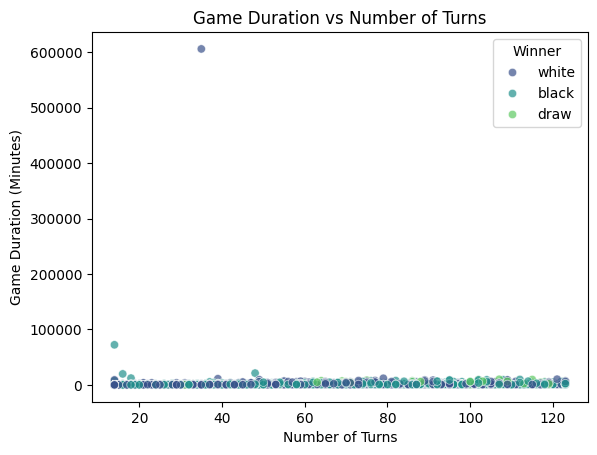

In [99]:
sns.scatterplot(data=data_df, x='Number_of_Turns', y='Game_Duration', hue=target['Winner'], palette='viridis', alpha=0.7)
plt.title('Game Duration vs Number of Turns')
plt.xlabel('Number of Turns')
plt.ylabel('Game Duration (Minutes)')
plt.show()

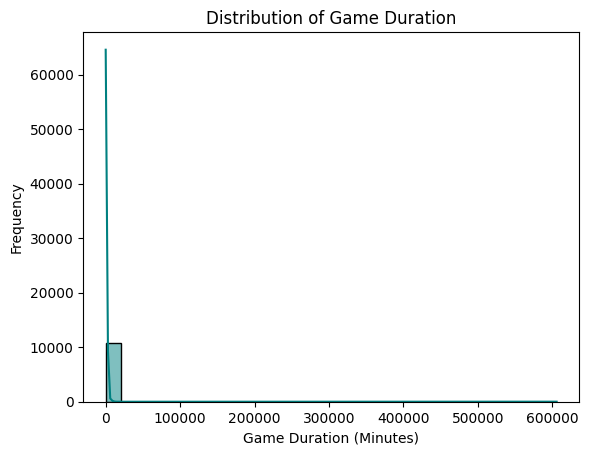

In [100]:
sns.histplot(data=data_df, x='Game_Duration', kde=True, color='teal', bins=30)
plt.title('Distribution of Game Duration')
plt.xlabel('Game Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()